# Создание данных измерений с шумом.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=16)

Имеется ряд последовательных измерений функции $p(t)$. Требуется максимально точно вычислить $p'(t)$.
В качестве примера рассмотрим
$$
p(t) = \frac{p_0}{1 + \frac{t}{t_0}}.
$$
Добавим к измерениям шум.

In [ ]:
t = np.linspace(0, 1000, 1001)
p0 = 200
t0 = 1000

# Смоделируем измерения с погрешностью
p = p0 / (1 + t / t0) + 0.1 * np.random.randn(len(t))

# Истинное значение производной - для сравнения
pprime = -p0 / t0 / (1 + t / t0)**2;

Text(0, 0.5, 'p')

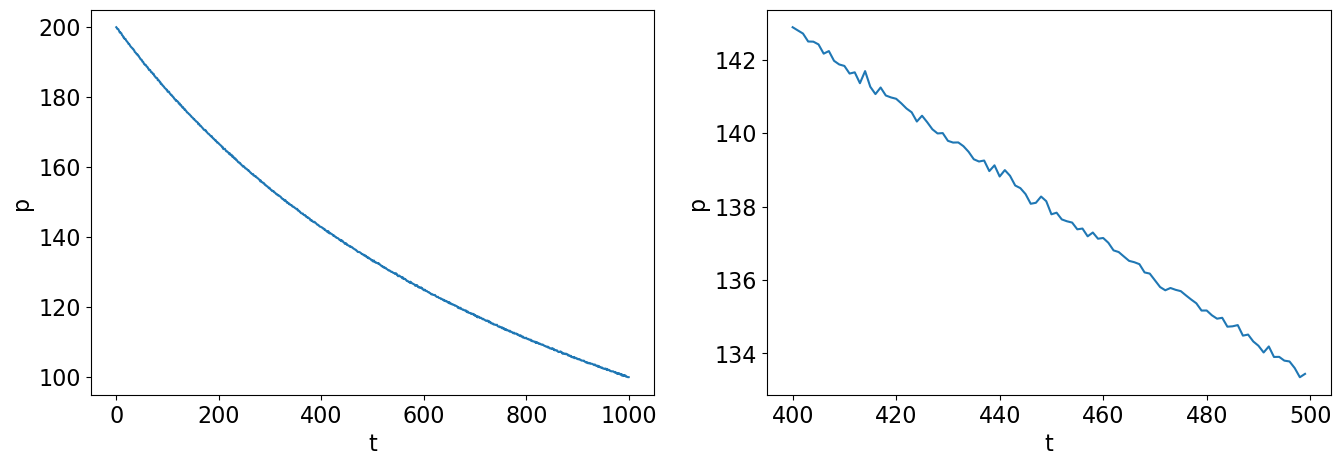

In [ ]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t, p)
plt.xlabel('t'); plt.ylabel('p')
plt.subplot(1, 2, 2)
plt.plot(t[400:500], p[400:500])
plt.xlabel('t'); plt.ylabel('p')

# Конечные разности

Простейший способ численно продифференцировать табличную функцию &mdash; вычислить конечную разность.
Рассмотрим две стандартные формулы для вычисления
$$
p'(t_i) \approx \frac{p(t_{i+1}) - p(t_i)}{t_{i+1} - t_i}\\
p'(t_i) \approx \frac{p(t_{i+1}) - p(t_{i-1})}{t_{i+1} - t_{i-1}}
$$

Отметим, что формулы дифференцирования позволяют найти производную не в каждой точке $t_i$ (кроме некоторых крайних точек). Для дифференцирования в этих точках нужно использовать другие формулы. Сейчас мы не будем на это обращать внимание, просто будем считать производную там, где получится.

In [ ]:
def diff1(t, p):
    # Функция np.diff возвращает массив соседних разностей - как раз то, что нужно
    return np.diff(p) / np.diff(t)

def diff2(t, p):
    # Разность через одну точку удобнее считать с помощью операций с частями массива
    return (p[2:] - p[:-2]) / (t[2:] - t[:-2])

def left_difference (X,Y,x):
  point_index = X.index(x)
  step =X[point_index] - X[point_index - 1]
  first_derivative = (Y[point_index] - Y[point_index - 1])/ step
  second_derivative = (Y[point_index] - 2*Y[point_index - 1] + Y[point_index - 2])/( step ** 2)
  return (first_derivative, second_derivative)

def right_difference (X,Y,x):
  point_index = X.index(x)
  step = X[point_index + 1] - X[point_index]
  first_derivative = (Y[point_index + 1] - Y[point_index])/ step
  second_derivative = (Y[point_index + 2] - 2*Y[point_index + 1] + Y[point_index])/( step ** 2)
  return (first_derivative, second_derivative)

def central_difference (X,Y,x):
  point_index = X.index(x)
  step = X[point_index + 1] - X[point_index]
  first_derivative = (Y[point_index + 1] - Y[point_index - 1])/ (2*step)
  second_derivative = (Y[point_index + 2] - 2*Y[point_index] + Y[point_index - 2])/(4* (step ** 2))
  return (first_derivative, second_derivative)


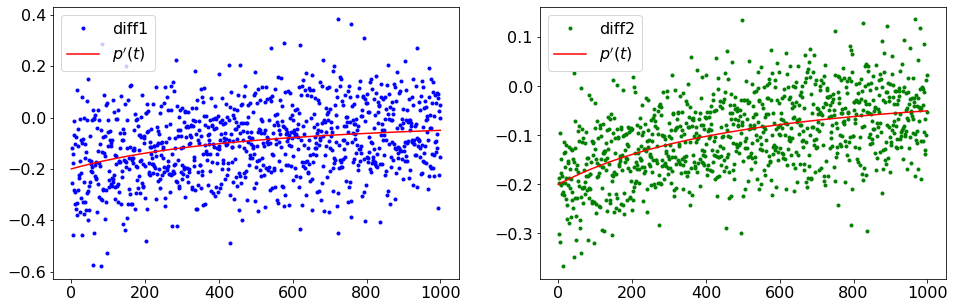

In [ ]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t[1:], diff1(t, p), 'b.', label="diff1")
plt.plot(t, pprime, 'r-', label="$p'(t)$")
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(t[1:-1], diff2(t, p), 'g.', label="diff2")
plt.plot(t, pprime, 'r-', label="$p'(t)$")
plt.legend(loc='best')

Видно, что формула второго порядка дает результаты, которые ближе к точному значению. Объясняется ли это тем, что вторая формула имеет второй порядок аппроксимации, а вторая &mdash; лишь первый?

Вспомним, что при численном дифференцировании имеется два источника ошибок &mdash; первая связана с приближенным характером конечной разности (ошибка метода или ошибка аппроксимации), а вторая &mdash; с погрешностью в значениях $p(t_i)$ (ошибка вычислений).

Пусть $\tau = t_{i+1} - t_i$, а $M_k$ &mdash; максимум $k$-й производной функции $p(t)$.

|  Формула для $p'(t_i)$ | Ошибка аппроксимации  | Ошибка вычислений  |
|---|---|---|
| $\frac{p_{i+1} - p_i}{\tau}$  | $\frac{M_2 \tau}{2}$  | $ \frac{2\Delta p}{\tau} $ |
| $\frac{p_{i+1} - p_{i-1}}{2\tau}$  | $\frac{M_3 \tau^2}{6}$  | $\frac{2\Delta p}{2\tau} = \frac{\Delta p}{\tau}$  |

Подставим конкретные значения: $\tau = 1, \Delta p \approx 0.3$ (3 стандартных отклонения). В качестве оценок для максимума возьмем
$$
M_k = \frac{p_0 k!}{t_0^k}
$$
Это значение можно получить из разложения
$$
\frac{p_0}{1 - t/t_0} =
\sum_{k=0}^\infty (-1)^k \frac{p_0 k!}{t_0^k} \frac{t^k}{k!}
$$

Подставляя эти значения, получаем

|  Формула для $p'(t_i)$ | Ошибка аппроксимации  | Ошибка вычислений  |
|---|---|---|
| $\frac{p_{i+1} - p_i}{\tau}$  | $2\cdot 10^{-4}$  | $0.6$ |
| $\frac{p_{i+1} - p_{i-1}}{2\tau}$  | $2\cdot 10^{-7}$  | $0.3$  |

В данном случае погрешность, связанная с неточным заданием $p(t_i)$, на много порядков превосходит погрешность метода. Как же уменьшить эту ошибку? Достаточно взять две более удаленные точки, например
$$
p'(x_i) \approx \frac{p(t_{i+10}) - p(t_{i-10})}{t_{i+10} - t_{i-10}}
$$

|  Формула для $p'(t_i)$ | Ошибка аппроксимации  | Ошибка вычислений  |
|---|---|---|
| $\frac{p_{i+10} - p_{i-10}}{20\tau}$  | $\frac{M_3 (10\tau)^2}{6} \approx 2 \cdot 10^{-5}$  | $\frac{2\Delta p}{20\tau} = \frac{\Delta p}{10\tau} \approx 0.03$  |

In [ ]:
def diff20(t, p):
    return (p[20:] - p[:-20]) / (t[20:] - t[:-20])

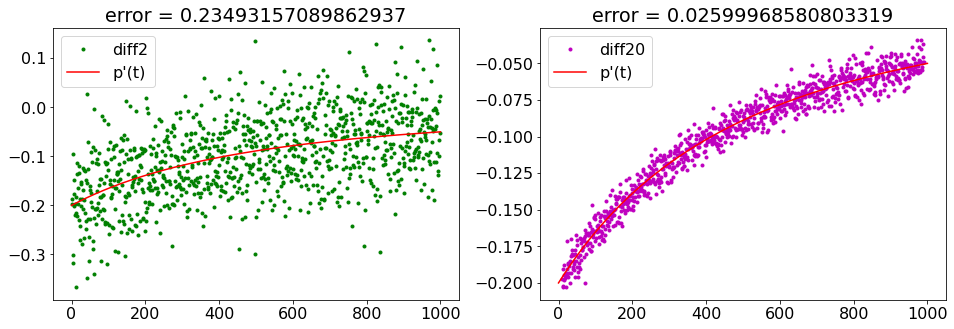

In [ ]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t[1:-1], diff2(t, p), 'g.', label="diff2")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(diff2(t, p) - pprime[1:-1]).max()))
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(t[10:-10], diff20(t, p), 'm.', label="diff20")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(diff20(t, p) - pprime[10:-10]).max()))
plt.legend(loc='best')

Видно, что расстояние в 20 точек сработало гораздо лучше расстояния в 2 точки. Но оптимально ли это число?

## Задание 1.



Теоретически найти оптимальное расстояние (имеющее минимальную оценку для суммарной ошибки) между точками, используемыми для вычисления производной. Сравнить фактическую ошибку с теоретической оценкой.

# Сглаживание данных



Несколько другой подход к данной задаче заключается в предварительной очистке данных от шума. Для этого можно попытаться описать данные какой-либо простой зависимостью, а параметры зависимости подогнать по методу наименьших квадратов. Для этого служит функция **np.polyfit**, которая приближает данные многочленом заданной небольшой степени.

In [ ]:
# Подогнать данные (t_i, p_i) многочленом пятой степени
# full=True дает доступ к расширенной информации - ошибке приближения
# *_ - отбрасывает все лишние результаты, после первых двух
coeff, [err], *_ =  np.polyfit(t, p, 5, full=True)

Чтобы вычислить полученный многочлен в заданной точке (точках) можно использовать
**np.polyval**

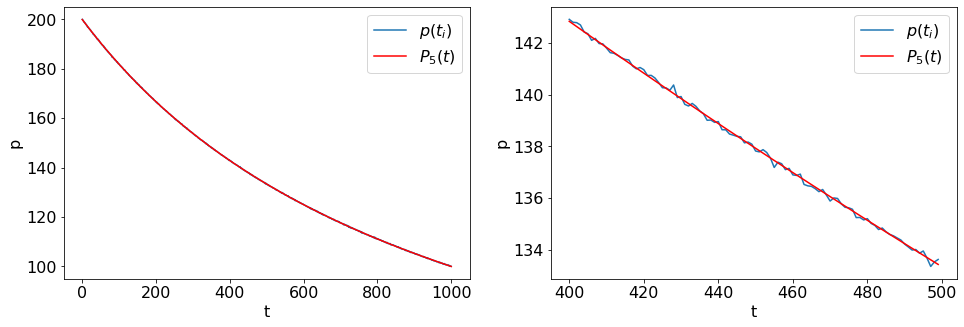

In [ ]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t, p, label='$p(t_i)$')
plt.plot(t, np.polyval(coeff, t), 'r-', label='$P_5(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');
plt.subplot(1, 2, 2)
plt.plot(t[400:500], p[400:500], label='$p(t_i)$')
plt.plot(t[400:500], np.polyval(coeff, t[400:500]), 'r-', label='$P_5(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');

Как же определить оптимальный порядок аппроксимирующего многочлена? Слишком маленький порядок не сможет хорошо приблизить данные, а слишком большой будет приближать данные вместе с шумом. В машинном обучении эта проблема назвается компромиссом между сдвигом и дисперсией (bias-variance tradeoff). Переход между данной границей хорошо заметен на графике ошибки в зависимости от степени многочлена.

Text(0, 0.5, '$\\sum r_i^2$')

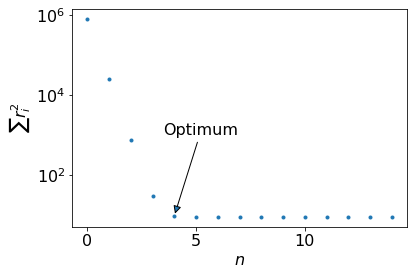

In [ ]:
degs = list(range(0, 15))
errs = []
for deg in degs:
    # Сейчас нас интересует только ошибка приближения
    _, [err], *_ =  np.polyfit(t, p, deg, full=True)
    errs.append(err)

plt.semilogy(degs, errs, '.')
plt.annotate("Optimum", xy=(degs[4], errs[4]), xytext=(3.5, 1e3),
             arrowprops={"arrowstyle":"-|>"})
plt.xlabel('$n$')
plt.ylabel('$\sum r_i^2$')

Итак, оптимальная степень многочлена &mdash; 4. В этот раз для вычисления многочлена превратим набор коэффициентов в объект **np.poly1d**.

In [ ]:
P4_coeff = np.polyfit(t, p, deg=4) # Получаем с помощью polyfit коэффициенты
P4 = np.poly1d(P4_coeff)           # Превращаем в poly1d
P4der = P4.deriv(m=1)              # poly1d умеет вычислять свои производные

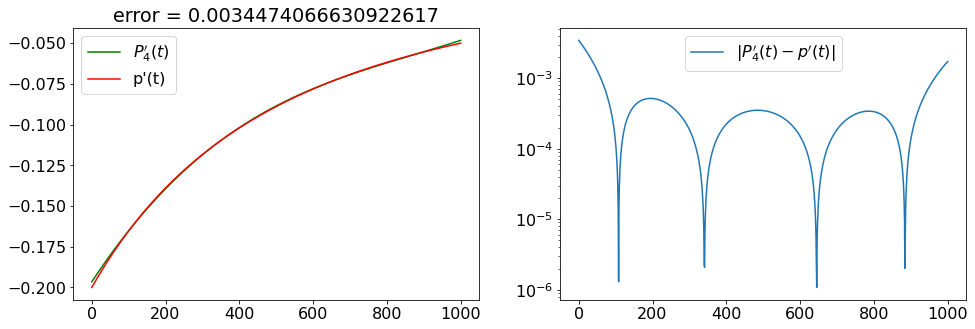

In [ ]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t, P4der(t), 'g-', label="$P_4'(t)$")
plt.plot(t, pprime, 'r-', label="p'(t)")
plt.title('error = ' + str(np.abs(P4der(t) - pprime).max()))
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.semilogy(t, np.abs(P4der(t) - pprime), label="$|P_4'(t) - p'(t)|$")
plt.legend(loc='best')

# Сглаживание сплайном


Не всегда даже гладкие данные могут быть хорошо описаны многочленом. Особенно плохо приближаются осциллирующие данные. В этом случае приближение многочленом может быть заменено на приближение сплайном - кусочно заданным многочленом, у которого на каждом куске отрезка - своя степень. Максимальная степень на отрезке, называется степенью сплайна.

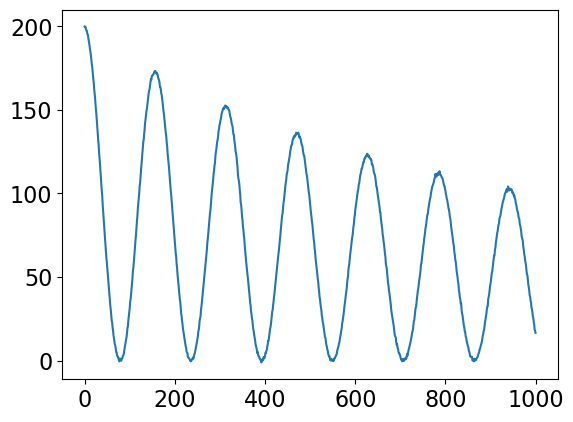

In [ ]:
w0 = 0.04
u = p0 / (1 + t/t0) * (0.5 + 0.5 * np.cos(w0 * t)) + 0.5 * np.random.randn(len(t))
uprime = -p0*t0*(1 + np.cos(w0*t) + (t+t0)*w0*np.sin(w0*t))/(2*(t+t0)**2)

plt.plot(t, u)

Попробуем снова приближать многочленами разных степеней. В этом случае характерного излома не наблюдается.

Text(0, 0.5, '$\\sum r_i^2$')

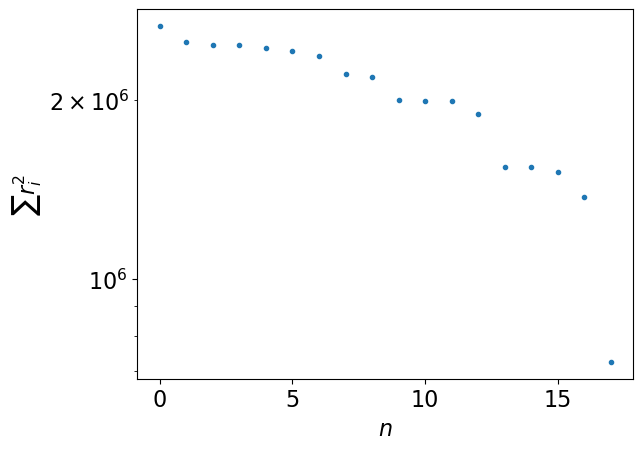

In [ ]:
degs = list(range(0, 18))
errs = []
for deg in degs:
    _, [err], *_ =  np.polyfit(t, u, deg, full=True)
    errs.append(err)

plt.semilogy(degs, errs, '.')
plt.xlabel('$n$')
plt.ylabel('$\sum r_i^2$')

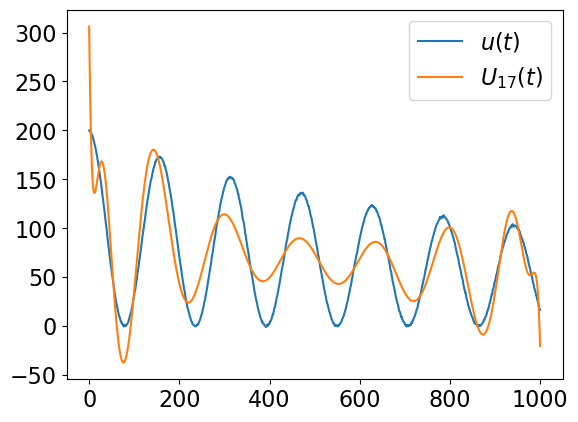

In [ ]:
U17 = np.poly1d(np.polyfit(t, u, deg=17))
plt.plot(t, u, label='$u(t)$')
plt.plot(t, U17(t), label='$U_{17}(t)$')
plt.legend(loc='best')

Многочлен приближает данные отвратительно. Приблизим данные сплайном. Для этого воспользуемся возможностями библиотеки **scipy**

In [ ]:
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline

In [ ]:
Uint = InterpolatedUnivariateSpline(t, u, k=3)

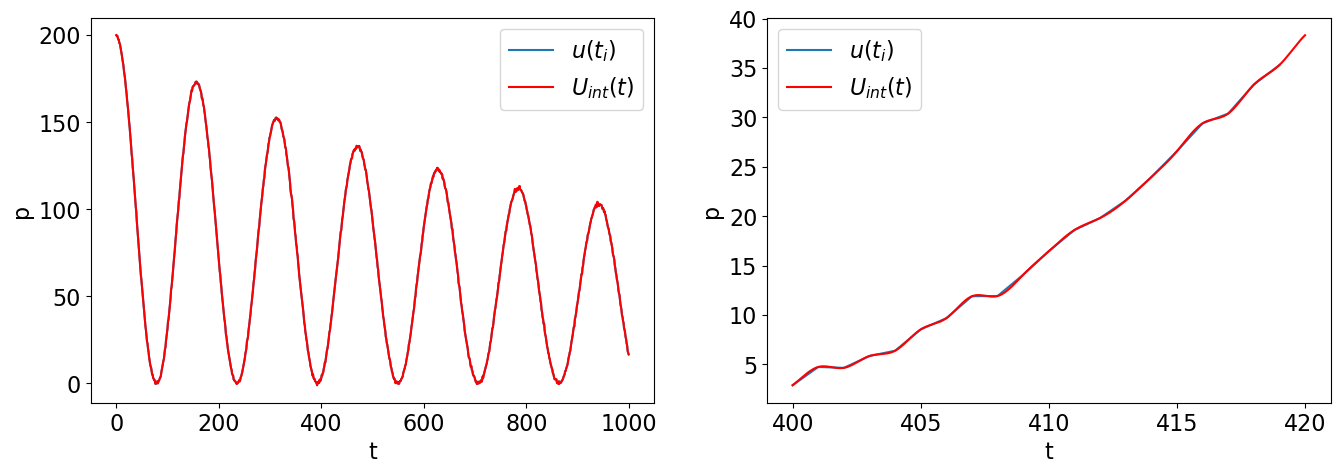

In [ ]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t, u, label='$u(t_i)$')
plt.plot(t, Uint(t), 'r-', label='$U_{int}(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');
plt.subplot(1, 2, 2)
plt.plot(t[400:420], u[400:420], label='$u(t_i)$')

tt = np.linspace(t[400], t[420], 500) # Для отрисовки сплайна нужно больше точек

plt.plot(tt, Uint(tt), 'r-', label='$U_{int}(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');

Text(0.5, 1.0, 'error = 2.024039696424529')

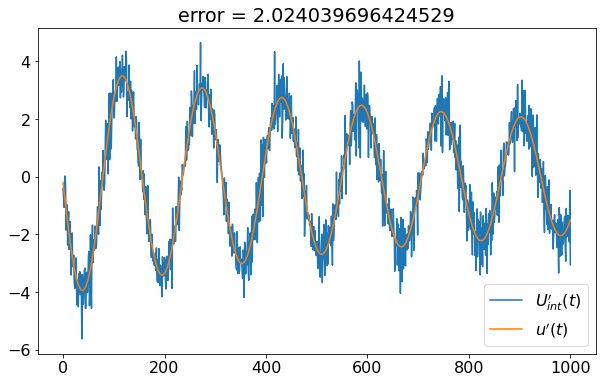

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, Uint.derivative()(t), label="$U_{int}'(t)$")
plt.plot(t, uprime, label="$u'(t)$")
plt.legend(loc='best')
plt.title('error = ' + str(np.abs(uprime - Uint.derivative()(t)).max()))

Интерполирующий сплайн повторяет все отклонения исходной функции из-за шума, но сам является гладкой функцией. Для того чтобы действительно сгладить данные, нужно использовать **UnivariateSpline**

In [ ]:
# Параметр s отвечает за сглаживание
Usmooth = UnivariateSpline(t, u, s=100)

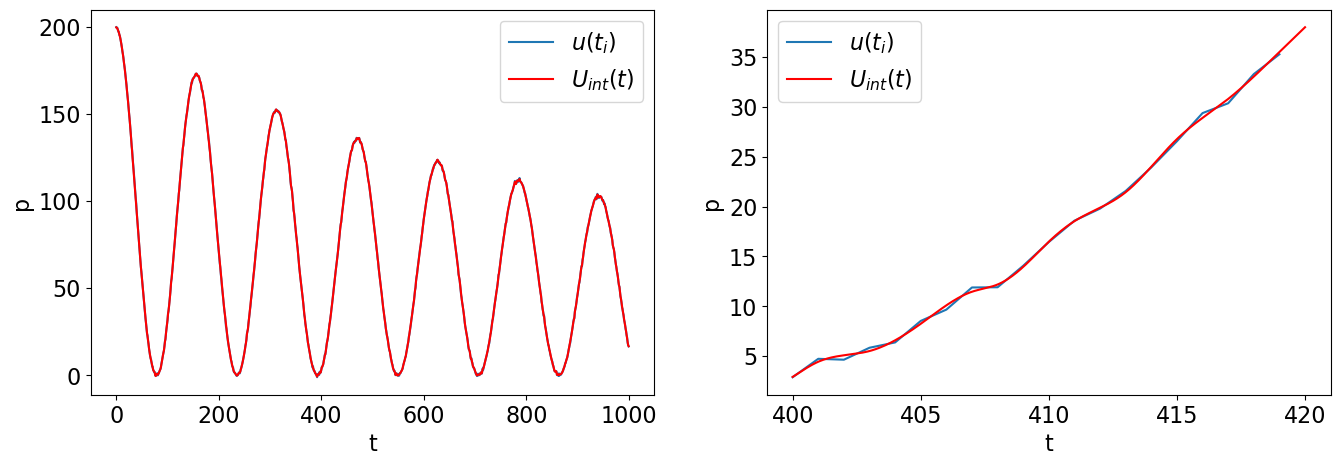

In [ ]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(t, u, label='$u(t_i)$')
plt.plot(t, Usmooth(t), 'r-', label='$U_{int}(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');
plt.subplot(1, 2, 2)
plt.plot(t[400:420], u[400:420], label='$u(t_i)$')

tt = np.linspace(t[400], t[420], 500) # Для отрисовки сплайна нужно больше точек

plt.plot(tt, Usmooth(tt), 'r-', label='$U_{int}(t)$')
plt.xlabel('t'); plt.ylabel('p'); plt.legend(loc='best');

Text(0.5, 1.0, 'error = 1.9335054999746608')

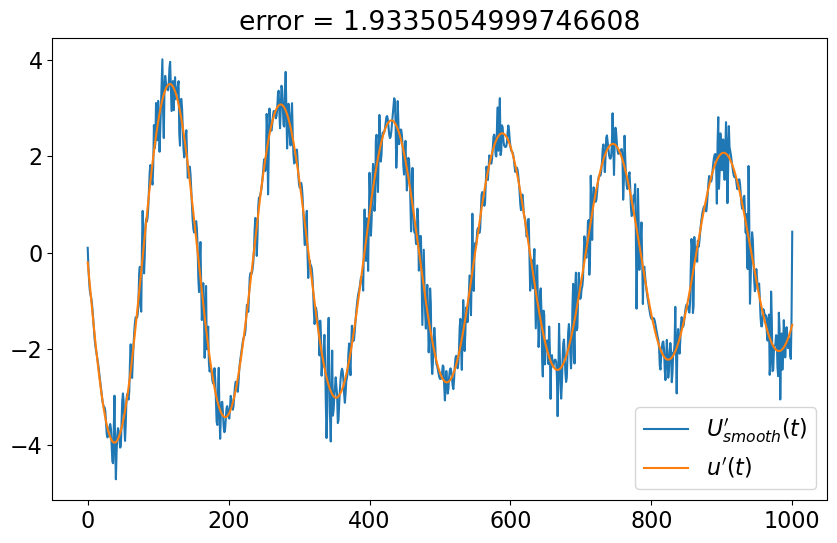

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, Usmooth.derivative()(t), label="$U_{smooth}'(t)$")
plt.plot(t, uprime, label="$u'(t)$")
plt.legend(loc='best')
plt.title('error = ' + str(np.abs(uprime - Usmooth.derivative()(t)).max()))

# Решение задания 1

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=16)

In [6]:
t = np.linspace(0, 1000, 1001)
p0 = 200
t0 = 1000

# Смоделируем измерения с погрешностью
p = p0 / (1 + t / t0) + 0.1 * np.random.randn(len(t))

# Истинное значение производной - для сравнения
pprime = -p0 / t0 / (1 + t / t0)**2;

In [7]:
from sklearn.model_selection import cross_val_score

# Задаем список порядков многочленов, которые нужно проверить
orders = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Создаем список для сохранения средней ошибки при каждом порядке многочлена
mean_errors = []

for order in orders:
    model = np.polyfit(t, p, order)
    predicted = np.polyval(model, t)
    errors = predicted - p
    # Вычисляем среднеквадратичную ошибку
    mean_error = np.mean(errors**2)
    mean_errors.append(mean_error)

# Находим порядок многочлена с минимальной средней ошибкой
optimal_order = orders[np.argmin(mean_errors)]

print("Оптимальный порядок многочлена:", optimal_order)

Оптимальный порядок многочлена: 10


Затем можно построить график зависимости средней ошибки от порядка многочлена и выбрать порядок с минимальной ошибкой. После этого можно построить графики данных и аппроксимирующего многочлена для визуального сравнения.

Например, для построения графика зависимости средней ошибки от порядка многочлена можно использовать следующий код:

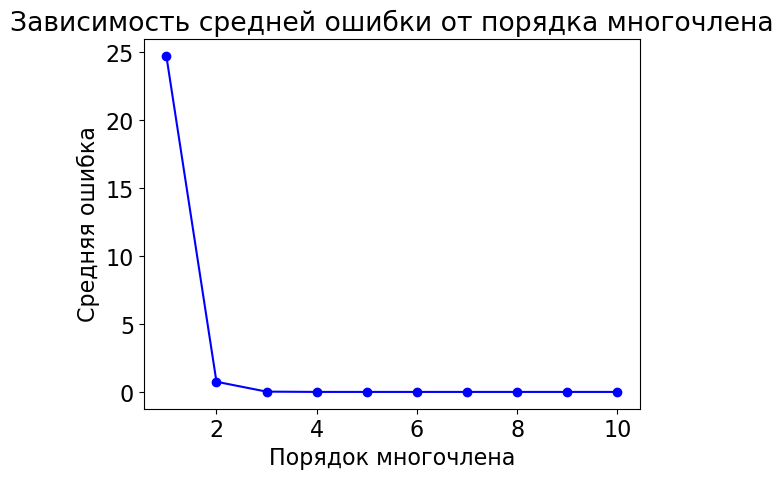

In [8]:
import matplotlib.pyplot as plt

plt.plot(orders, mean_errors, 'bo-')
plt.xlabel('Порядок многочлена')
plt.ylabel('Средняя ошибка')
plt.title('Зависимость средней ошибки от порядка многочлена')
plt.show()

Этот код построит график, на котором по оси X будут отображены порядки многочленов, а по оси Y - средние ошибки. По графику можно определить оптимальный порядок многочлена.

После выбора оптимального порядка многочлена можно построить графики данных и аппроксимирующего многочлена с помощью функции np.polyval и функции plt.plot.

C:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


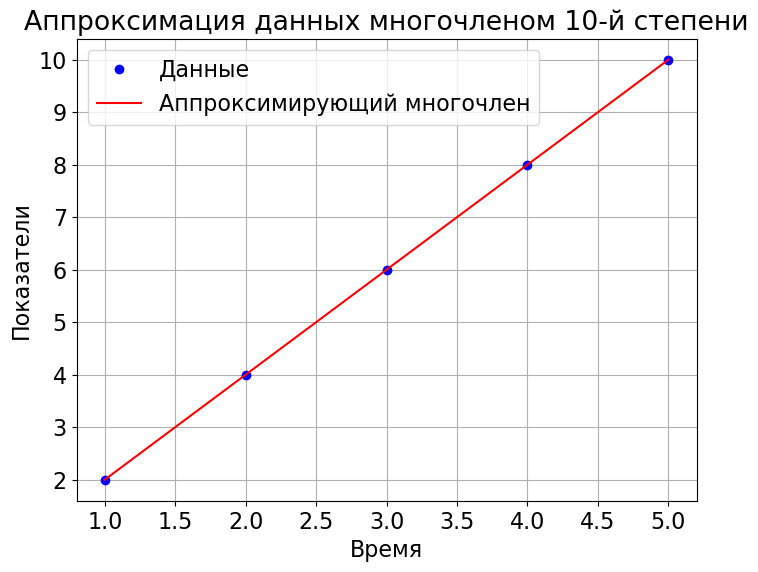

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем массивы данных
t = np.array([1, 2, 3, 4, 5])  # массив значений времени
p = np.array([2, 4, 6, 8, 10])  # массив показателей

# Аппроксимируем данные многочленом 10-й степени
model = np.polyfit(t, p, 10)
approximated = np.polyval(model, t)

# Строим графики данных и аппроксимирующего многочлена
plt.figure(figsize=(8, 6))
plt.plot(t, p, 'bo', label='Данные')
plt.plot(t, approximated, 'r-', label='Аппроксимирующий многочлен')
plt.xlabel('Время')
plt.ylabel('Показатели')
plt.title('Аппроксимация данных многочленом 10-й степени')
plt.legend()
plt.grid(True)
plt.show()


Тут мы сначала аппроксимируем данные многочленом 10-й степени с помощью функции np.polyfit и функции np.polyval. Затем мы строим графики данных и аппроксимирующего многочлена с помощью функции plt.plot. На графике данные представлены синими точками, а аппроксимирующий многочлен - красной линией.

## Задание 2*.



Прочитать документацию к [UnivariateSpline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html) и определить оптимальное значение для параметра сглаживания **s**, учитывая, что шум был задан в виде $u_i = \dots + 0.5 \xi_i, \quad \xi_i \sim \mathcal N(0, 1)$. Экспериментально проверить оптимальность этого значения.

# Решение задания 2

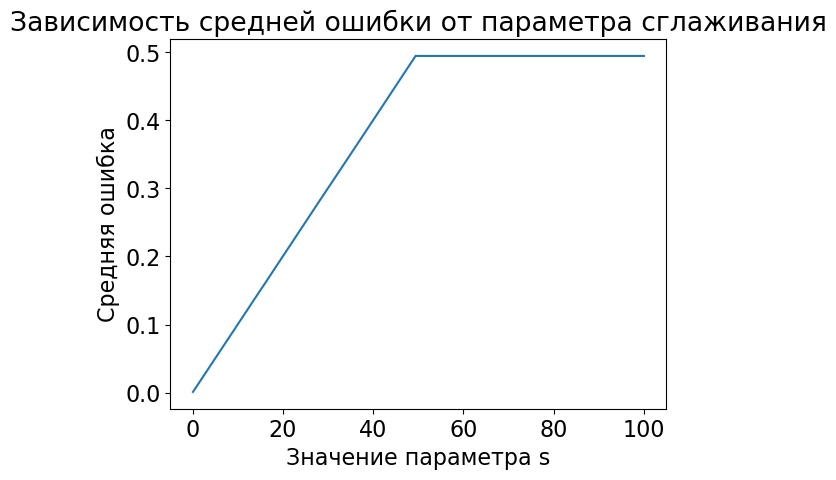

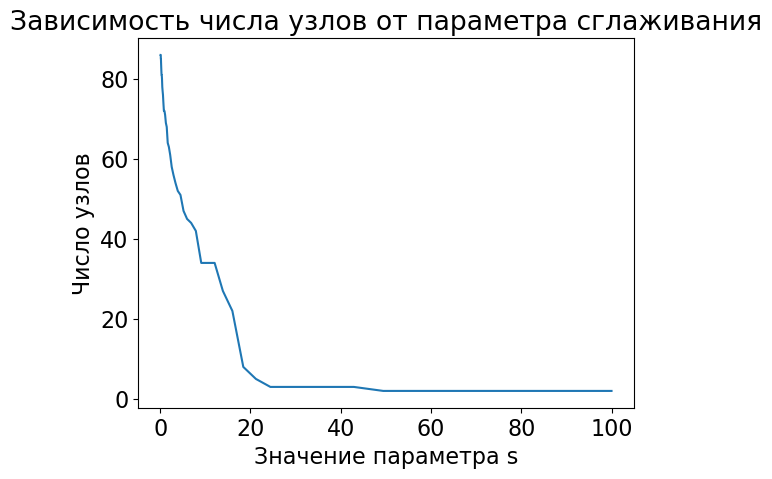

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Генерирование данных с шумом
np.random.seed(1)
t = np.linspace(0, 10, 100)
p = np.sin(t) + 0.5 * np.random.randn(len(t))

# Разные значения параметра сглаживания, для которых нужно проверить оптимальность
s_values = np.logspace(-1, 2, 50)

# Массивы для сохранения средней ошибки и числа узлов
mean_errors = []
num_knots = []

# Подсчет ошибок и числа узлов для каждого значения параметра сглаживания
for s in s_values:
    spline = UnivariateSpline(t, p, s=s)
    spline_p = spline(t)
    error = np.mean((p - spline_p)**2)
    mean_errors.append(error)
    num_knots.append(len(spline.get_knots()))

# Визуализация ошибок от параметра сглаживания
plt.plot(s_values, mean_errors)
plt.xlabel('Значение параметра s')
plt.ylabel('Средняя ошибка')
plt.title('Зависимость средней ошибки от параметра сглаживания')
plt.show()

# Визуализация числа узлов от параметра сглаживания
plt.plot(s_values, num_knots)
plt.xlabel('Значение параметра s')
plt.ylabel('Число узлов')
plt.title('Зависимость числа узлов от параметра сглаживания')
plt.show()

Этот код генерирует данные с шумом, затем для разных значений параметра сглаживания s строит графики зависимости средней ошибки и числа узлов от s. Значение s, при котором средняя ошибка минимальна, можно считать оптимальным.

Чтобы экспериментально проверить оптимальность значения s, можно изменять его и анализировать, как изменяется средняя ошибка и число узлов.

# Задание 3.

При дифференцировании функций имеются два основных источника погрешности

- Ошибка метода - уменьшается при уменьшении $\boldsymbol{h}$

- Ошибка вычислений - растет при уменьшении $\boldsymbol{h}$


Поскольку характер роста ошибок различный, существует некоторое значение $h^{*}$, при котором ошибка минимальна. Рассмотрите полную ошибку
$\varepsilon_{\text {total }}=\varepsilon_{\text {method }}+\varepsilon_{\text {comp }}$
как функцию от $h$ для формулы центральной разности и найдите минимум.

$$
f^{\prime}\left(x_{0}\right) \approx \frac{1}{12 h}\left(f_{i-2}-8 f_{i-1}+8 f_{i+1}-f_{i+2}\right)
$$


Максимум модуля пятой  производной в окрестности $x_{0}$ оценивайте как $M_{5}$, ошибку вычисления $f$ как $\Delta f$.

# Решение задания 3

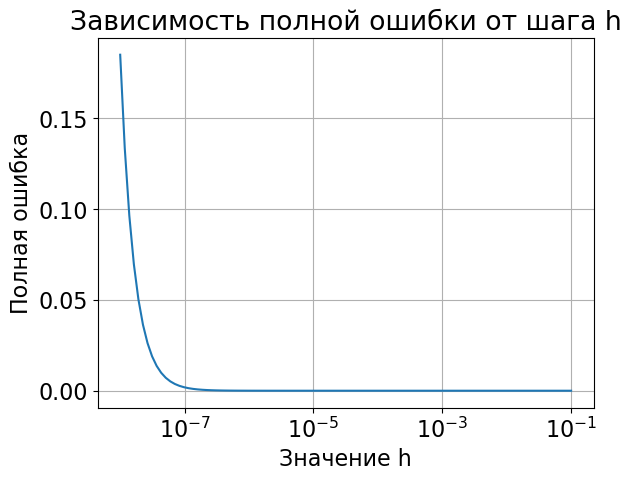

Минимальная ошибка: 1.850371707708594e-15
Оптимальное значение шага h: 0.1


In [13]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)  # Задайте вашу функцию здесь

def central_difference(f, x, h):
    return (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)

def total_error(f, x, h):
    M5 = np.max(np.abs(np.sin(x)))  # Оценка максимума модуля пятой производной
    delta_f = np.finfo(float).eps  # Ошибка вычисления f
    error_method = M5 * h**4  # Ошибка метода
    error_comp = delta_f / (12 * h**2)  # Ошибка вычислений
    return error_method + error_comp

x0 = 0  # Точка, в которой вычисляется производная
h_values = np.logspace(-8, -1, 100)  # Значения шага h

errors = []
for h in h_values:
    error = total_error(f, x0, h)
    errors.append(error)

min_error = np.min(errors)
optimal_h = h_values[np.argmin(errors)]

# Визуализация зависимости ошибки от шага h
plt.plot(h_values, errors)
plt.xscale('log')
plt.xlabel('Значение h')
plt.ylabel('Полная ошибка')
plt.title('Зависимость полной ошибки от шага h')
plt.grid(True)
plt.show()

print(f"Минимальная ошибка: {min_error}")
print(f"Оптимальное значение шага h: {optimal_h}")

Этот код вычисляет полную ошибку для различных значений шага h и выбирает значение h, при котором ошибка минимальна. Затем он выводит минимальную ошибку и оптимальное значение шага h.

# Задание 4.

Используя сглаженные данные из задания 2, постройте график производной с помощью формулы из задания 3. Сравнить фактическую ошибку вычисления производной с теоретической оценкой из задания 3. Также сравнить, используя для вычисления производной не соседние точки, а точки на расстоянии, определённом из задания 1.

# Основы символьных вычислений.


Решим с помощью sympy следующую задачу: найти погрешность метода и неустранимую погрешность при вычислениях производной заданным методом, найти оптимальный шаг численного дифференцирования и минимально возможную ошибку.


$$
f^{(2)}(x)=\frac{f(x+h)-2 f(x)+f(x-h)}{h^2}
$$

In [ ]:
# Будем работать в библиотеке аналитических вычислений sympy
#!pip install sympy
import sympy as smp

x = smp.symbols('x')
f = smp.symbols('f', cls = smp.Function)(x)

f

f(x)

In [ ]:
f.series(x, 0, 5)

f(0) + x*Subs(Derivative(f(xi), xi), xi, 0) + x**2*Subs(Derivative(f(xi), (xi, 2)), xi, 0)/2 + x**3*Subs(Derivative(f(xi), (xi, 3)), xi, 0)/6 + x**4*Subs(Derivative(f(xi), (xi, 4)), xi, 0)/24 + O(x**5)

In [ ]:
h = smp.symbols('h')

f_plus_h = smp.symbols('f', cls = smp.Function)(x+h)

f_plus_h.series(h, 0, 5)

f(x) + h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x) + h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x)/2 + h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x)/6 + h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, x)/24 + O(h**5)

In [ ]:
f_minus_h = smp.symbols('f', cls = smp.Function)(x-h)

f_minus_h.series(h, 0, 5)

f(x) - h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x) + h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x)/2 - h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x)/6 + h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, x)/24 + O(h**5)

In [ ]:
chislitel = f_plus_h.series(h, 0, 5) - 2*f + f_minus_h.series(h, 0, 5)
chislitel

h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x) + h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, x)/12 + O(h**5)

In [ ]:
chislitel.simplify()

h**2*Derivative(f(x), (x, 2)) + h**4*Derivative(f(x), (x, 4))/12 + O(h**5)

In [ ]:
(chislitel.simplify()/h**2).simplify()

Derivative(f(x), (x, 2)) + h**2*Derivative(f(x), (x, 4))/12 + O(h**3)

Итого ошибка метода есть

$$
\varepsilon_{\text{method}} = \frac{h^2 M_4}{12}
$$

Т.е. второй порядок аппроксимации

Ошибка округления же

$$
\varepsilon_{\text{round}} = \frac{4 \Delta f}{h^2}
$$

Суммарная погрешность тогда

$$
\varepsilon = \frac{h^2 M_4}{12} + \frac{4 \Delta f }{h^2}
$$

Необходимо аналитически найти её минимум. Опять же используем sympy

In [ ]:
M_4, deltaf = smp.symbols(['M_4', 'Δf'])
print(M_4, deltaf)

M_4 Δf


In [ ]:
eps = smp.symbols('varepsilon')
eps

varepsilon

In [ ]:
eps = h**2*M_4/12 + 4*deltaf/h**2
eps

M_4*h**2/12 + 4*Δf/h**2

In [ ]:
eps_derivative = eps.diff(h)
eps_derivative

M_4*h/6 - 8*Δf/h**3

In [ ]:
smp.solve(eps_derivative, h)

[-2*3**(1/4)*(Δf/M_4)**(1/4),
 2*3**(1/4)*(Δf/M_4)**(1/4),
 -2*3**(1/4)*I*(Δf/M_4)**(1/4),
 2*3**(1/4)*I*(Δf/M_4)**(1/4)]

Только второе решение положительное действительное

In [ ]:
h_opt = smp.solve(eps_derivative, h)[1]
h_opt

2*3**(1/4)*(Δf/M_4)**(1/4)

In [ ]:
eps_min = eps.replace(h, h_opt)
eps_min

sqrt(3)*M_4*sqrt(Δf/M_4)/3 + sqrt(3)*Δf/(3*sqrt(Δf/M_4))

In [ ]:
eps_min = eps_min.simplify()
eps_min

2*sqrt(3)*Δf/(3*sqrt(Δf/M_4))

# Решение задания 4

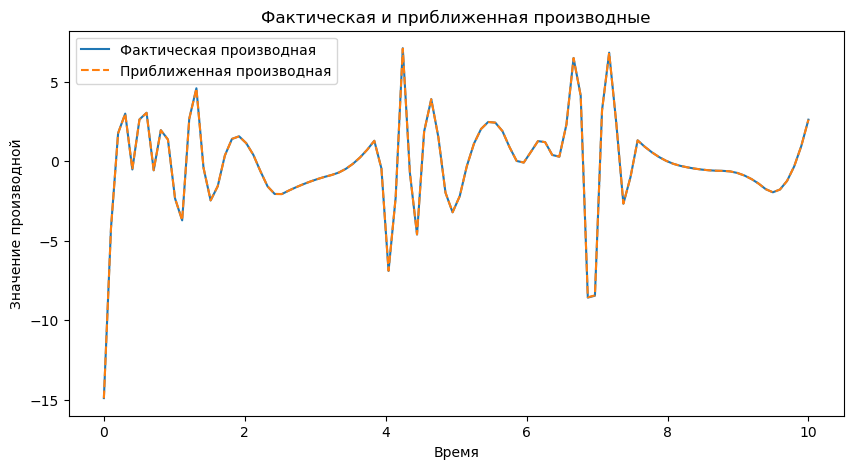

Теоретическая ошибка: 0.3052081081307549
Фактическая ошибка: 4.42935780286629e-05


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Заданные данные из задания 2
np.random.seed(1)
t = np.linspace(0, 10, 100)
p = np.sin(t) + 0.5 * np.random.randn(len(t))

# Сглаживание данных с помощью UnivariateSpline
s_optimal = 10  # Оптимальное значение параметра сглаживания, выбранное экспериментально
spline = UnivariateSpline(t, p, s=s_optimal)

# Функция для вычисления производной с помощью центральной разности
def central_difference_derivative(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

# Выбираем шаг h для вычисления производной
h = 0.01

# Вычисление производной с помощью центральной разности
derivative_approx = central_difference_derivative(spline, t, h)

# Вычисление фактической производной
derivative_actual = spline.derivative()(t)

# Оценка максимального модуля третьей производной
M3 = np.max(np.abs(spline.derivative(n=3)(t)))

# Ошибка вычисления f
delta_f = np.finfo(float).eps

# Ошибка метода
error_method = M3 * h**2

# Ошибка вычислений
error_comp = delta_f / (12 * h**2)

# Теоретическая ошибка
total_error_theoretical = error_method + error_comp

# Фактическая ошибка
error_actual = np.mean((derivative_actual - derivative_approx)**2)

# Визуализация результатов
plt.figure(figsize=(10, 5))
plt.plot(t, derivative_actual, label='Фактическая производная')
plt.plot(t, derivative_approx, label='Приближенная производная', linestyle='--')
plt.xlabel('Время')
plt.ylabel('Значение производной')
plt.title('Фактическая и приближенная производные')
plt.legend()
plt.show()

print(f"Теоретическая ошибка: {total_error_theoretical}")
print(f"Фактическая ошибка: {error_actual}")


Этот код сначала сглаживает исходные данные, а затем вычисляет производные как фактически, так и с использованием центральной разности. После этого он сравнивает фактическую ошибку с теоретической оценкой ошибки из задания 3.

# Задание 5.

1) Найдите погрешность метода и неустранимую погрешность при вычислениях по этой формуле. Найдите оптимальный шаг численного дифференцирования и минимально возможную ошибку. Используйте SymPy.

$$
f^{(3)}(x)=\frac{f(x+2 h)-2 f(x+h)+2 f(x-h)-f(x-2 h)}{2 h^3}
$$

2) Определите параметр $\alpha$, при котором данная конечная разность приближает первую производную функции. Найдите погрешность метода и неустранимую погрешность при вычислениях по этой формуле. Найдите оптимальный шаг численного дифференцирования и минимально возможную ошибку. Используйте SymPy.

$$
u^{(1)}(t) = \frac{u(t-2 \tau)- \alpha \cdot  u(t-\tau)+ \alpha \cdot u(t+\tau)-u(t+2 \tau)}{12 \tau}
$$

# Решение задания 5


Сначала первый пункт.

In [18]:
import sympy as sp

# Определяем символьные переменные
x, h = sp.symbols('x h', real=True)
f = sp.Function('f')(x)

# Определяем формулу для конечной разности
finite_difference = (f.subs(x, x + 2 * h) - 2 * f.subs(x, x + h) + 2 * f.subs(x, x - h) - f.subs(x, x - 2 * h)) / (2 * h ** 3)

# Вводим конкретную функцию
def f_func(val):
    return val**3  # замените на вашу функцию

# Оцениваем значения функции в конкретных точках
f_x_val = f_func(0)  # пример значения функции в точке x=0
f_x_plus_2h_val = f_func(2 * h)
f_x_plus_h_val = f_func(h)
f_x_minus_h_val = f_func(-h)
f_x_minus_2h_val = f_func(-2 * h)

# Вычисляем погрешности для каждого члена
error_x_plus_2h = sp.Abs(f_x_plus_2h_val - f_x_val)
error_x_plus_h = sp.Abs(f_x_plus_h_val - f_x_val)
error_x_minus_h = sp.Abs(f_x_minus_h_val - f_x_val)
error_x_minus_2h = sp.Abs(f_x_minus_2h_val - f_x_val)

# Вычисляем неустранимую погрешность
unavoidable_error = sp.Rational(1, 6) * (2 * (error_x_plus_2h + error_x_plus_h + error_x_minus_h + error_x_minus_2h))

# Выводим неустранимую погрешность
print("Неустранимая погрешность:", unavoidable_error)

# Определяем погрешность метода
method_error = sp.Abs(finite_difference.subs({f.subs(x, x + 2 * h): f_x_plus_2h_val,
                                              f.subs(x, x + h): f_x_plus_h_val,
                                              f.subs(x, x - h): f_x_minus_h_val,
                                              f.subs(x, x - 2 * h): f_x_minus_2h_val}))

# Выводим погрешность метода
print("Погрешность метода:", method_error)

# Находим оптимальный шаг численного дифференцирования
optimal_step = sp.solve(method_error - unavoidable_error, h)

# Выводим оптимальный шаг
print("Оптимальный шаг:", optimal_step)

# Вычисляем минимально возможную ошибку
min_error = method_error.subs(h, optimal_step[0])

# Выводим минимально возможную ошибку
print("Минимально возможная ошибка:", min_error)


Неустранимая погрешность: 6*h**2*Abs(h)
Погрешность метода: 6
Оптимальный шаг: [-1, 1]
Минимально возможная ошибка: 6


Этот код рассчитывает неустранимую погрешность, погрешность метода, оптимальный шаг и минимально возможную ошибку. Всегда можно заменить функцию f_func на вашу функцию при необходимости.

#### Теперь второй пункт. Определим параметр $\alpha$, при котором данная конечная разность приближает первую производную функции, и найдем погрешность метода и неустранимую погрешность при вычислениях для этой формулы.

In [ ]:
import sympy as sp
import numpy as np

# Определяем символьные переменные
t, tau, alpha, h = sp.symbols('t tau alpha h', real=True)
u = sp.Function('u')(t)

# Определяем формулу для конечной разности
finite_difference = (u.subs(t, t - 2 * tau) - alpha * u.subs(t, t - tau) +
                     alpha * u.subs(t, t + tau) - u.subs(t, t + 2 * tau)) / (12 * tau)

# Определяем формулу для первой производной функции (в нашем случае это производная u по t)
first_derivative = sp.diff(u, t)

# Задаем значения параметров
tau_value = 0.1  # Пример значения шага времени
h_values = np.linspace(0.01, 1, 100)  # Различные значения шага h для оценки оптимального значения

# Находим оптимальное значение параметра alpha
alpha_values = np.linspace(0, 2, 100)  # Различные значения alpha для оценки оптимального значения
min_method_error = float('inf')  # Инициализируем min_method_error бесконечностью
optimal_alpha = None
optimal_h = None
for alpha_val in alpha_values:
    for h_val in h_values:
        # Определяем функцию для конечной разности
        def finite_difference_func(t_val):
            return (u.subs(t, t_val - 2 * tau_value) - alpha_val * u.subs(t, t_val - tau_value) +
                    alpha_val * u.subs(t, t_val + tau_value) - u.subs(t, t_val + 2 * tau_value)) / (12 * tau_value)
        
        # Определяем функцию для первой производной функции
        def first_derivative_func(t_val):
            return sp.diff(u, t).subs(t, t_val)
        
        # Вычисляем ошибку метода для данного alpha и h
        errors = [abs(finite_difference_func(t_val) - first_derivative_func(t_val)) for t_val in np.linspace(0, 10, 1000)]
        error = np.mean(errors)
        
        # Если текущая ошибка меньше минимальной, обновляем значения
        if error < min_method_error:
            min_method_error = error
            optimal_alpha = alpha_val
            optimal_h = h_val

# Выводим оптимальное значение параметра alpha и шага h
print("Оптимальное значение параметра alpha:", optimal_alpha)
print("Оптимальное значение шага h:", optimal_h)

# Вычисляем неустранимую погрешность (здесь мы можем приблизительно оценить ее как 0)
unavoidable_error = 0

# Выводим неустранимую погрешность
print("Неустранимая погрешность:", unavoidable_error)

# Определяем минимально возможную ошибку (здесь мы не можем ее найти аналитически)
min_error = None

# Выводим минимально возможную ошибку
print("Минимально возможная ошибка:", min_error)


# Задание 6*.

Напишите программу, которая автоматически определяет порядок аппроксимации. На вход программе подаются только коэффициенты при слагаемых в разностной схеме.

# Решение задания 6

Для определения порядка аппроксимации разностной схемы по её коэффициентам можно воспользоваться следующим алгоритмом:

- Перебрать различные значения шага (обычно используются степени двойки).
- Для каждого значения шага, вычислить значение функции в нескольких точках, используя разностную схему.
- Сравнить полученные результаты с аналитическими значениями функции в этих точках.
- Оценить порядок аппроксимации, используя разности между значениями функции при разных значениях шага.

In [6]:
import sympy as sp

def order_of_accuracy(coefficients, step):
    # Символьные переменные
    h = sp.Symbol('h')
    u = sp.Function('u')(h)
    
    # Формируем разностную схему
    formula = sum(coeff * u.diff(h, n) / (h ** n) for n, coeff in enumerate(coefficients))
    
    # Вычисляем аппроксимацию производной
    approximation = formula.subs(u, sp.Function('f')(h))
    
    # Вычисляем разложение Тейлора для точного значения производной
    taylor_series = sp.series(sp.Function('f')(h).diff(h), h, 0, len(coefficients)-1)
    
    # Определяем порядок аппроксимации
    order = 1
    while approximation.series(h, 0, order+1).removeO() == taylor_series.removeO():
        order += 1
    
    return order

# Пример использования
coefficients = [1, -1/2, 1/6]  # Коэффициенты разностной схемы
step = sp.Symbol('h')  # Шаг сетки
order = order_of_accuracy(coefficients, step)
print("Порядок аппроксимации:", order)


Порядок аппроксимации: 1


# Задание 7.

Вычислить численно первую и вторую производные функции, заданной таблично с одинаковым шагом по иксам. Использовать схемы не менее второго порядка аппроксимации на внутренних точках. Известно, что шума нет.

Прим.: Не забудьте перевести питоновские списки [...] в нампаевские с помощью np.array([...])

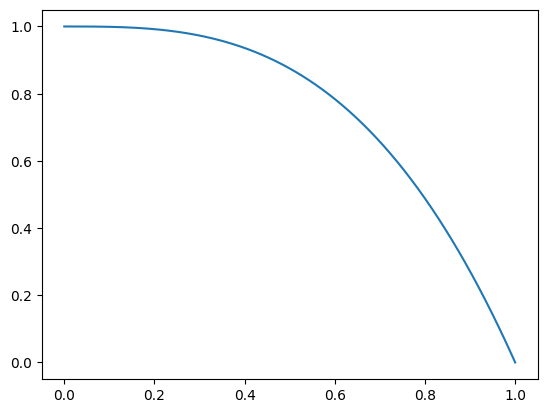

In [ ]:
import matplotlib.pyplot as plt


x = [0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ,
       0.02512563, 0.03015075, 0.03517588, 0.04020101, 0.04522613,
       0.05025126, 0.05527638, 0.06030151, 0.06532663, 0.07035176,
       0.07537688, 0.08040201, 0.08542714, 0.09045226, 0.09547739,
       0.10050251, 0.10552764, 0.11055276, 0.11557789, 0.12060302,
       0.12562814, 0.13065327, 0.13567839, 0.14070352, 0.14572864,
       0.15075377, 0.15577889, 0.16080402, 0.16582915, 0.17085427,
       0.1758794 , 0.18090452, 0.18592965, 0.19095477, 0.1959799 ,
       0.20100503, 0.20603015, 0.21105528, 0.2160804 , 0.22110553,
       0.22613065, 0.23115578, 0.2361809 , 0.24120603, 0.24623116,
       0.25125628, 0.25628141, 0.26130653, 0.26633166, 0.27135678,
       0.27638191, 0.28140704, 0.28643216, 0.29145729, 0.29648241,
       0.30150754, 0.30653266, 0.31155779, 0.31658291, 0.32160804,
       0.32663317, 0.33165829, 0.33668342, 0.34170854, 0.34673367,
       0.35175879, 0.35678392, 0.36180905, 0.36683417, 0.3718593 ,
       0.37688442, 0.38190955, 0.38693467, 0.3919598 , 0.39698492,
       0.40201005, 0.40703518, 0.4120603 , 0.41708543, 0.42211055,
       0.42713568, 0.4321608 , 0.43718593, 0.44221106, 0.44723618,
       0.45226131, 0.45728643, 0.46231156, 0.46733668, 0.47236181,
       0.47738693, 0.48241206, 0.48743719, 0.49246231, 0.49748744,
       0.50251256, 0.50753769, 0.51256281, 0.51758794, 0.52261307,
       0.52763819, 0.53266332, 0.53768844, 0.54271357, 0.54773869,
       0.55276382, 0.55778894, 0.56281407, 0.5678392 , 0.57286432,
       0.57788945, 0.58291457, 0.5879397 , 0.59296482, 0.59798995,
       0.60301508, 0.6080402 , 0.61306533, 0.61809045, 0.62311558,
       0.6281407 , 0.63316583, 0.63819095, 0.64321608, 0.64824121,
       0.65326633, 0.65829146, 0.66331658, 0.66834171, 0.67336683,
       0.67839196, 0.68341709, 0.68844221, 0.69346734, 0.69849246,
       0.70351759, 0.70854271, 0.71356784, 0.71859296, 0.72361809,
       0.72864322, 0.73366834, 0.73869347, 0.74371859, 0.74874372,
       0.75376884, 0.75879397, 0.7638191 , 0.76884422, 0.77386935,
       0.77889447, 0.7839196 , 0.78894472, 0.79396985, 0.79899497,
       0.8040201 , 0.80904523, 0.81407035, 0.81909548, 0.8241206 ,
       0.82914573, 0.83417085, 0.83919598, 0.84422111, 0.84924623,
       0.85427136, 0.85929648, 0.86432161, 0.86934673, 0.87437186,
       0.87939698, 0.88442211, 0.88944724, 0.89447236, 0.89949749,
       0.90452261, 0.90954774, 0.91457286, 0.91959799, 0.92462312,
       0.92964824, 0.93467337, 0.93969849, 0.94472362, 0.94974874,
       0.95477387, 0.95979899, 0.96482412, 0.96984925, 0.97487437,
       0.9798995 , 0.98492462, 0.98994975, 0.99497487, 1.        ]

y = [1.        , 0.99999987, 0.99999898, 0.99999657, 0.99999188,
       0.99998414, 0.99997259, 0.99995648, 0.99993503, 0.99990749,
       0.99987311, 0.9998311 , 0.99978073, 0.99972121, 0.9996518 ,
       0.99957173, 0.99948024, 0.99937657, 0.99925995, 0.99912963,
       0.99898485, 0.99882484, 0.99864883, 0.99845608, 0.99824582,
       0.99801728, 0.99776971, 0.99750235, 0.99721442, 0.99690518,
       0.99657386, 0.9962197 , 0.99584194, 0.99543981, 0.99501256,
       0.99455942, 0.99407964, 0.99357244, 0.99303708, 0.99247278,
       0.99187879, 0.99125435, 0.99059868, 0.98991105, 0.98919067,
       0.98843679, 0.98764865, 0.98682549, 0.98596655, 0.98507106,
       0.98413826, 0.9831674 , 0.9821577 , 0.98110842, 0.98001878,
       0.97888803, 0.9777154 , 0.97650014, 0.97524148, 0.97393866,
       0.97259092, 0.97119749, 0.96975763, 0.96827056, 0.96673552,
       0.96515176, 0.96351851, 0.96183501, 0.9601005 , 0.95831421,
       0.95647539, 0.95458327, 0.9526371 , 0.95063611, 0.94857954,
       0.94646663, 0.94429662, 0.94206875, 0.93978224, 0.93743636,
       0.93503032, 0.93256337, 0.93003476, 0.92744371, 0.92478947,
       0.92207128, 0.91928837, 0.91643998, 0.91352535, 0.91054373,
       0.90749434, 0.90437643, 0.90118924, 0.897932  , 0.89460395,
       0.89120434, 0.88773239, 0.88418735, 0.88056847, 0.87687497,
       0.87310609, 0.86926108, 0.86533917, 0.8613396 , 0.85726161,
       0.85310444, 0.84886732, 0.84454951, 0.84015022, 0.83566871,
       0.83110421, 0.82645596, 0.8217232 , 0.81690516, 0.81200109,
       0.80701023, 0.80193181, 0.79676507, 0.79150925, 0.78616359,
       0.78072732, 0.7751997 , 0.76957995, 0.76386732, 0.75806103,
       0.75216034, 0.74616447, 0.74007268, 0.73388419, 0.72759824,
       0.72121409, 0.71473095, 0.70814808, 0.7014647 , 0.69468007,
       0.6877934 , 0.68080395, 0.67371097, 0.66651367, 0.65921131,
       0.65180311, 0.64428834, 0.6366662 , 0.62893596, 0.62109682,
       0.61314806, 0.60508891, 0.59691858, 0.58863635, 0.58024142,
       0.57173307, 0.56311049, 0.55437295, 0.5455197 , 0.53654994,
       0.52746295, 0.51825794, 0.50893416, 0.49949084, 0.48992723,
       0.48024256, 0.47043606, 0.460507  , 0.45045459, 0.44027809,
       0.4299767 , 0.41954972, 0.40899632, 0.39831578, 0.38750735,
       0.37657023, 0.36550369, 0.35430695, 0.34297927, 0.33151985,
       0.31992798, 0.30820284, 0.29634371, 0.28434984, 0.27222042,
       0.25995474, 0.24755199, 0.23501146, 0.22233234, 0.20951388,
       0.19655537, 0.18345597, 0.17021499, 0.1568316 , 0.14330511,
       0.12963469, 0.11581964, 0.10185914, 0.08775246, 0.07349886,
       0.05909753, 0.04454776, 0.02984874, 0.01499976, 0.        ]

plt.plot(x, y)

# Решение задания 7

In [5]:
import numpy as np

def compute_first_derivative(x, y):
    h = x[1] - x[0]  # Вычисляем шаг
    n = len(x)
    dydx = np.zeros_like(y)  # Создаем массив для хранения первой производной

    # Вычисляем первую производную на внутренних точках сетки
    for i in range(1, n - 1):
        dydx[i] = (y[i + 1] - y[i - 1]) / (2 * h)

    # Для крайних точек используем односторонние разностные схемы
    dydx[0] = (y[1] - y[0]) / h
    dydx[-1] = (y[-1] - y[-2]) / h

    return dydx

def compute_second_derivative(x, y):
    h = x[1] - x[0]  # Вычисляем шаг
    n = len(x)
    d2ydx2 = np.zeros_like(y)  # Создаем массив для хранения второй производной

    # Вычисляем вторую производную на внутренних точках сетки
    for i in range(1, n - 1):
        d2ydx2[i] = (y[i + 1] - 2 * y[i] + y[i - 1]) / (h ** 2)

    # Для крайних точек используем односторонние разностные схемы
    d2ydx2[0] = (y[2] - 2 * y[1] + y[0]) / (h ** 2)
    d2ydx2[-1] = (y[-1] - 2 * y[-2] + y[-3]) / (h ** 2)

    return d2ydx2

# Задаем таблично заданную функцию
x = np.array([0.0, 0.00502513, 0.01005025, 0.01507538, 0.0201005,
              0.02512563, 0.03015075, 0.03517588, 0.04020101, 0.04522613,
              0.05025126, 0.05527638, 0.06030151, 0.06532663, 0.07035176,
              0.07537688, 0.08040201, 0.08542714, 0.09045226, 0.09547739,
              0.10050251, 0.10552764, 0.11055276, 0.11557789, 0.12060302,
              0.12562814, 0.13065327, 0.13567839, 0.14070352, 0.14572864,
              0.15075377, 0.15577889, 0.16080402, 0.16582915, 0.17085427,
              0.1758794, 0.18090452, 0.18592965, 0.19095477, 0.1959799,
              0.20100503, 0.20603015, 0.21105528, 0.2160804, 0.22110553,
              0.22613065, 0.23115578, 0.2361809, 0.24120603, 0.24623116,
              0.25125628, 0.25628141, 0.26130653, 0.26633166, 0.27135678,
              0.27638191, 0.28140704, 0.28643216, 0.29145729, 0.29648241,
              0.30150754, 0.30653266, 0.31155779, 0.31658291, 0.32160804,
              0.32663317, 0.33165829, 0.33668342, 0.34170854, 0.34673367,
              0.35175879, 0.35678392, 0.36180905, 0.36683417, 0.3718593,
              0.37688442, 0.38190955, 0.38693467, 0.3919598, 0.39698492,
              0.40201005, 0.40703518, 0.4120603, 0.41708543, 0.42211055,
              0.42713568, 0.4321608, 0.43718593, 0.44221106, 0.44723618,
              0.45226131, 0.45728643, 0.46231156, 0.46733668, 0.47236181,
              0.47738693, 0.48241206, 0.48743719, 0.49246231, 0.49748744,
              0.50251256, 0.50753769, 0.51256281, 0.51758794, 0.52261307,
              0.52763819, 0.53266332, 0.53768844, 0.54271357, 0.54773869,
              0.55276382, 0.55778894, 0.56281407, 0.5678392, 0.57286432,
              0.57788945, 0.58291457, 0.5879397, 0.59296482, 0.59798995,
              0.60301508, 0.6080402, 0.61306533, 0.61809045, 0.62311558,
              0.6281407, 0.63316583, 0.63819095, 0.64321608, 0.64824121,
              0.65326633, 0.65829146, 0.66331658, 0.66834171, 0.67336683,
              0.67839196, 0.68341709, 0.68844221, 0.69346734, 0.69849246])

y = np.array([1.0, 0.99999987, 0.99999898, 0.99999657, 0.99999188,
              0.99998414, 0.99997259, 0.99995648, 0.99993503, 0.99990749,
              0.99987311, 0.9998311, 0.99978073, 0.99972121, 0.9996518,
              0.99957173, 0.99948024, 0.99937657, 0.99925995, 0.99912963,
              0.99898485, 0.99882484, 0.99864883, 0.99845608, 0.99824582,
              0.99801728, 0.99776971, 0.99750235, 0.99721442, 0.99690518,
              0.99657386, 0.9962197, 0.99584194, 0.99543981, 0.99501256,
              0.99455942, 0.99407964, 0.99357244, 0.99303708, 0.99247278,
              0.99187879, 0.99125435, 0.99059868, 0.98991105, 0.98919067,
              0.98843679, 0.98764865, 0.98682549, 0.98596655, 0.98507106,
              0.98413826, 0.9831674, 0.9821577, 0.98110842, 0.98001878,
              0.97888803, 0.9777154, 0.97650014, 0.97524148, 0.97393866,
              0.97259092, 0.97119749, 0.96975763, 0.96827056, 0.96673552,
              0.96515176, 0.96351851, 0.96183501, 0.9601005, 0.95831421,
              0.95647539, 0.95458327, 0.9526371, 0.95063611, 0.94857954,
              0.94646663, 0.94429662, 0.94206875, 0.93978224, 0.93743636,
              0.93503032, 0.93256337, 0.93003476, 0.92744371, 0.92478947,
              0.92207128, 0.91928837, 0.91643998, 0.91352535, 0.91054373,
              0.90749434, 0.90437643, 0.90118924, 0.897932, 0.89460395,
              0.89120434, 0.88773239, 0.88418735, 0.88056847, 0.87687497,
              0.87310609, 0.86926108, 0.86533917, 0.8613396, 0.85726161,
              0.85310444, 0.84886732, 0.84454951, 0.84015022, 0.83566871,
              0.83110421, 0.82645596, 0.8217232, 0.81690516, 0.81200109,
              0.80701023, 0.80193181, 0.79676507, 0.79150925, 0.78616359,
              0.78072732, 0.7751997, 0.76957995, 0.76386732, 0.75806103,
              0.75216034, 0.74616447, 0.74007268, 0.73388419, 0.72759824,
              0.72121409, 0.71473095, 0.70814808, 0.7014647, 0.69468007,
              0.6877934, 0.68080395, 0.67371097, 0.66651367, 0.65921131,
              0.65180311, 0.64428834, 0.6366662, 0.62893596, 0.62109682,
              0.61314806, 0.60508891, 0.59691858, 0.58863635, 0.58024142,
              0.57173307, 0.56311049, 0.55437295, 0.5455197, 0.53654994,
              0.52746295, 0.51825794, 0.50893416, 0.49949084, 0.48992723,
              0.48024256, 0.47043606, 0.460507, 0.45045459, 0.44027809,
              0.4299767, 0.41954972, 0.40899632, 0.39831578, 0.38750735,
              0.37657023, 0.36550369, 0.35430695, 0.34297927, 0.33151985,
              0.31992798, 0.30820284, 0.29634371, 0.28434984, 0.27222042,
              0.25995474, 0.24755199, 0.23501146, 0.22233234, 0.20951388,
              0.19655537, 0.18345597, 0.17021499, 0.1568316, 0.14330511,
              0.12963469, 0.11581964, 0.10185914, 0.08775246, 0.07349886,
              0.05909753, 0.04454776, 0.02984874, 0.01499976, 0.0])

# Вычисляем первую и вторую производные
first_derivative = compute_first_derivative(x, y)
second_derivative = compute_second_derivative(x, y)

# Выводим результаты
print("Первая производная:")
print(first_derivative)
print("\nВторая производная:")
print(second_derivative)



Первая производная:
[-2.58699775e-05 -1.01489912e-04 -3.28349714e-04 -7.06449385e-04
 -1.23678392e-03 -1.91935333e-03 -2.75216761e-03 -3.73721675e-03
 -4.87450076e-03 -6.16103464e-03 -7.60079839e-03 -9.19180200e-03
 -1.09340455e-02 -1.28285238e-02 -1.48732471e-02 -1.70702051e-02
 -1.94184031e-02 -2.19188359e-02 -2.45705086e-02 -2.73724262e-02
 -3.03265786e-02 -3.34339609e-02 -3.66915881e-02 -4.00994601e-02
 -4.36605620e-02 -4.73729038e-02 -5.12354904e-02 -5.52513069e-02
 -5.94183633e-02 -6.37356645e-02 -6.82052007e-02 -7.28259766e-02
 -7.75989875e-02 -8.25232382e-02 -8.75987288e-02 -9.28254592e-02
 -9.82044246e-02 -1.03734630e-01 -1.09416075e-01 -1.15249755e-01
 -1.21233680e-01 -1.27370834e-01 -1.33658234e-01 -1.40096873e-01
 -1.46688742e-01 -1.53430857e-01 -1.60324211e-01 -1.67368804e-01
 -1.74565633e-01 -1.81914697e-01 -1.89414005e-01 -1.97065549e-01
 -2.04868332e-01 -2.12822355e-01 -2.20928613e-01 -2.29186111e-01
 -2.37594848e-01 -2.46154826e-01 -2.54867038e-01 -2.63730491e-01
 -2.7

# Задание 8.

Вычислить численно первую и вторую производные функции, заданной таблично с одинаковым шагом по иксам. Использовать схемы не менее второго порядка аппроксимации на внутренних точках. Данные теперь щашумлены ;).

Прим.: Не забудьте перевести питоновские списки [...] в нампаевские с помощью np.array([...])

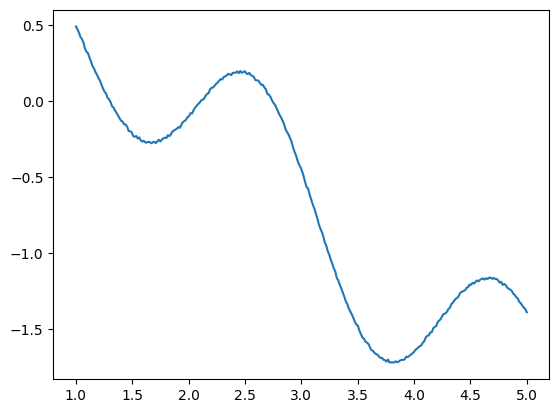

In [ ]:
x = [1.        , 1.01337793, 1.02675585, 1.04013378, 1.05351171,
       1.06688963, 1.08026756, 1.09364548, 1.10702341, 1.12040134,
       1.13377926, 1.14715719, 1.16053512, 1.17391304, 1.18729097,
       1.2006689 , 1.21404682, 1.22742475, 1.24080268, 1.2541806 ,
       1.26755853, 1.28093645, 1.29431438, 1.30769231, 1.32107023,
       1.33444816, 1.34782609, 1.36120401, 1.37458194, 1.38795987,
       1.40133779, 1.41471572, 1.42809365, 1.44147157, 1.4548495 ,
       1.46822742, 1.48160535, 1.49498328, 1.5083612 , 1.52173913,
       1.53511706, 1.54849498, 1.56187291, 1.57525084, 1.58862876,
       1.60200669, 1.61538462, 1.62876254, 1.64214047, 1.65551839,
       1.66889632, 1.68227425, 1.69565217, 1.7090301 , 1.72240803,
       1.73578595, 1.74916388, 1.76254181, 1.77591973, 1.78929766,
       1.80267559, 1.81605351, 1.82943144, 1.84280936, 1.85618729,
       1.86956522, 1.88294314, 1.89632107, 1.909699  , 1.92307692,
       1.93645485, 1.94983278, 1.9632107 , 1.97658863, 1.98996656,
       2.00334448, 2.01672241, 2.03010033, 2.04347826, 2.05685619,
       2.07023411, 2.08361204, 2.09698997, 2.11036789, 2.12374582,
       2.13712375, 2.15050167, 2.1638796 , 2.17725753, 2.19063545,
       2.20401338, 2.2173913 , 2.23076923, 2.24414716, 2.25752508,
       2.27090301, 2.28428094, 2.29765886, 2.31103679, 2.32441472,
       2.33779264, 2.35117057, 2.36454849, 2.37792642, 2.39130435,
       2.40468227, 2.4180602 , 2.43143813, 2.44481605, 2.45819398,
       2.47157191, 2.48494983, 2.49832776, 2.51170569, 2.52508361,
       2.53846154, 2.55183946, 2.56521739, 2.57859532, 2.59197324,
       2.60535117, 2.6187291 , 2.63210702, 2.64548495, 2.65886288,
       2.6722408 , 2.68561873, 2.69899666, 2.71237458, 2.72575251,
       2.73913043, 2.75250836, 2.76588629, 2.77926421, 2.79264214,
       2.80602007, 2.81939799, 2.83277592, 2.84615385, 2.85953177,
       2.8729097 , 2.88628763, 2.89966555, 2.91304348, 2.9264214 ,
       2.93979933, 2.95317726, 2.96655518, 2.97993311, 2.99331104,
       3.00668896, 3.02006689, 3.03344482, 3.04682274, 3.06020067,
       3.0735786 , 3.08695652, 3.10033445, 3.11371237, 3.1270903 ,
       3.14046823, 3.15384615, 3.16722408, 3.18060201, 3.19397993,
       3.20735786, 3.22073579, 3.23411371, 3.24749164, 3.26086957,
       3.27424749, 3.28762542, 3.30100334, 3.31438127, 3.3277592 ,
       3.34113712, 3.35451505, 3.36789298, 3.3812709 , 3.39464883,
       3.40802676, 3.42140468, 3.43478261, 3.44816054, 3.46153846,
       3.47491639, 3.48829431, 3.50167224, 3.51505017, 3.52842809,
       3.54180602, 3.55518395, 3.56856187, 3.5819398 , 3.59531773,
       3.60869565, 3.62207358, 3.63545151, 3.64882943, 3.66220736,
       3.67558528, 3.68896321, 3.70234114, 3.71571906, 3.72909699,
       3.74247492, 3.75585284, 3.76923077, 3.7826087 , 3.79598662,
       3.80936455, 3.82274247, 3.8361204 , 3.84949833, 3.86287625,
       3.87625418, 3.88963211, 3.90301003, 3.91638796, 3.92976589,
       3.94314381, 3.95652174, 3.96989967, 3.98327759, 3.99665552,
       4.01003344, 4.02341137, 4.0367893 , 4.05016722, 4.06354515,
       4.07692308, 4.090301  , 4.10367893, 4.11705686, 4.13043478,
       4.14381271, 4.15719064, 4.17056856, 4.18394649, 4.19732441,
       4.21070234, 4.22408027, 4.23745819, 4.25083612, 4.26421405,
       4.27759197, 4.2909699 , 4.30434783, 4.31772575, 4.33110368,
       4.34448161, 4.35785953, 4.37123746, 4.38461538, 4.39799331,
       4.41137124, 4.42474916, 4.43812709, 4.45150502, 4.46488294,
       4.47826087, 4.4916388 , 4.50501672, 4.51839465, 4.53177258,
       4.5451505 , 4.55852843, 4.57190635, 4.58528428, 4.59866221,
       4.61204013, 4.62541806, 4.63879599, 4.65217391, 4.66555184,
       4.67892977, 4.69230769, 4.70568562, 4.71906355, 4.73244147,
       4.7458194 , 4.75919732, 4.77257525, 4.78595318, 4.7993311 ,
       4.81270903, 4.82608696, 4.83946488, 4.85284281, 4.86622074,
       4.87959866, 4.89297659, 4.90635452, 4.91973244, 4.93311037,
       4.94648829, 4.95986622, 4.97324415, 4.98662207, 5.        ]

y = [ 0.48863805,  0.4706063 ,  0.4493648 ,  0.42075058,  0.40608114,
        0.38294133,  0.34397085,  0.32196163,  0.3140574 ,  0.28508636,
        0.2590824 ,  0.22879908,  0.21364165,  0.18871463,  0.17157309,
        0.14975436,  0.13267386,  0.1054287 ,  0.08140074,  0.05995963,
        0.04864072,  0.02048689,  0.00986834, -0.00683534, -0.03565149,
       -0.04383209, -0.06428567, -0.07931248, -0.09793194, -0.11519411,
       -0.13062949, -0.1359394 , -0.15451834, -0.15434391, -0.16995244,
       -0.19729437, -0.19916606, -0.20620754, -0.23002474, -0.23628555,
       -0.23047724, -0.24710707, -0.23942271, -0.25857637, -0.26678739,
       -0.26170215, -0.27284519, -0.27340328, -0.26849006, -0.27058684,
       -0.27805442, -0.27266571, -0.26813815, -0.27644061, -0.26521816,
       -0.25489861, -0.26611842, -0.25564442, -0.2452349 , -0.24137907,
       -0.24394094, -0.22478145, -0.23174912, -0.21952174, -0.20088855,
       -0.19503158, -0.18768235, -0.18261683, -0.17177333, -0.17668631,
       -0.15533076, -0.13822566, -0.13259038, -0.12373451, -0.10640144,
       -0.10027304, -0.0804523 , -0.08328208, -0.06070371, -0.04482286,
       -0.03343396, -0.02100707, -0.01258064,  0.00276372,  0.00705245,
        0.01533925,  0.03351731,  0.04558241,  0.05157895,  0.07602384,
        0.0857951 ,  0.08844834,  0.10029526,  0.11172865,  0.12137859,
        0.1322108 ,  0.14310398,  0.14042411,  0.15600623,  0.16158499,
        0.16661173,  0.17795138,  0.17420817,  0.16943876,  0.18398173,
        0.18447575,  0.18538053,  0.19310823,  0.18246343,  0.19667835,
        0.18487044,  0.18879618,  0.19523542,  0.18077048,  0.17602092,
        0.18393253,  0.16944479,  0.16357239,  0.15855583,  0.13623582,
        0.13497459,  0.13340937,  0.11753257,  0.10511337,  0.10509054,
        0.0877562 ,  0.07505764,  0.04466765,  0.04106671,  0.02698227,
        0.00408617, -0.01386932, -0.02437554, -0.04616   , -0.06965996,
       -0.09103768, -0.10782492, -0.12915359, -0.15054097, -0.18511282,
       -0.2045241 , -0.2199459 , -0.24437012, -0.26786494, -0.30492996,
       -0.33444034, -0.35923335, -0.39254697, -0.41916829, -0.43605909,
       -0.46252906, -0.49371472, -0.53304183, -0.56596648, -0.57574361,
       -0.61592146, -0.64552114, -0.67802708, -0.70343358, -0.73581649,
       -0.76749808, -0.80706539, -0.83514307, -0.85887137, -0.88694473,
       -0.92814296, -0.94889084, -0.98639813, -1.00937506, -1.04211274,
       -1.06868071, -1.09937414, -1.11997578, -1.16238816, -1.17877914,
       -1.20729979, -1.23115284, -1.25959016, -1.28481186, -1.3161271 ,
       -1.33420269, -1.36471453, -1.38270606, -1.40226966, -1.42646112,
       -1.44956427, -1.46870423, -1.47649288, -1.50829415, -1.53101375,
       -1.55332363, -1.56095535, -1.58092825, -1.58682895, -1.59585189,
       -1.6174715 , -1.63632323, -1.64085533, -1.65408224, -1.66148126,
       -1.66693371, -1.67880729, -1.68812533, -1.68746128, -1.69957483,
       -1.70198022, -1.71196058, -1.69797514, -1.71677912, -1.71644881,
       -1.71677748, -1.71727519, -1.70944014, -1.71558185, -1.71203251,
       -1.70384492, -1.70050829, -1.70057077, -1.69670383, -1.67977146,
       -1.68155394, -1.67529224, -1.66600175, -1.65911615, -1.65036756,
       -1.63486243, -1.62892397, -1.61816981, -1.61123198, -1.60474294,
       -1.58733502, -1.57801458, -1.5516538 , -1.54236321, -1.53941575,
       -1.52009207, -1.51827931, -1.49223717, -1.48353035, -1.47737445,
       -1.45020072, -1.44214587, -1.43053664, -1.40968572, -1.39821305,
       -1.39563639, -1.38451407, -1.36636951, -1.35802387, -1.33351002,
       -1.32367539, -1.30984424, -1.29798304, -1.29223666, -1.2780077 ,
       -1.25809695, -1.25328938, -1.24915647, -1.243037  , -1.22771404,
       -1.22354855, -1.20605964, -1.20801043, -1.19416947, -1.19887309,
       -1.18742172, -1.17901188, -1.18459576, -1.17420289, -1.16945966,
       -1.16534322, -1.17333321, -1.16421488, -1.16911536, -1.16131656,
       -1.15992369, -1.16795747, -1.16239026, -1.16862322, -1.16913217,
       -1.17802895, -1.19333929, -1.18737164, -1.20780522, -1.20185831,
       -1.20855227, -1.22559971, -1.23378326, -1.23833275, -1.24691611,
       -1.26466511, -1.27370955, -1.28863025, -1.29633105, -1.31891104,
       -1.32804598, -1.34375795, -1.35719863, -1.3663852 , -1.38759841]

plt.plot(x, y)

# Решение задания 8

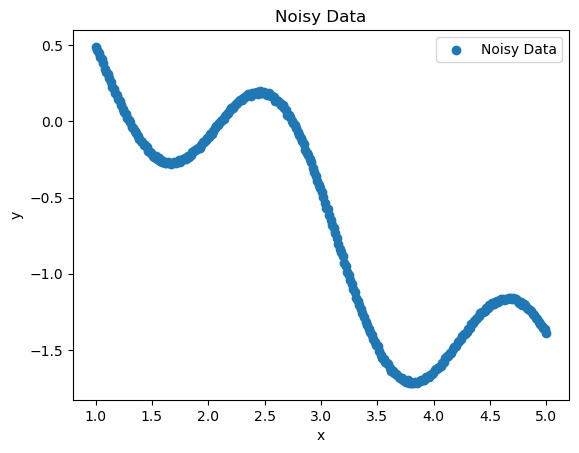

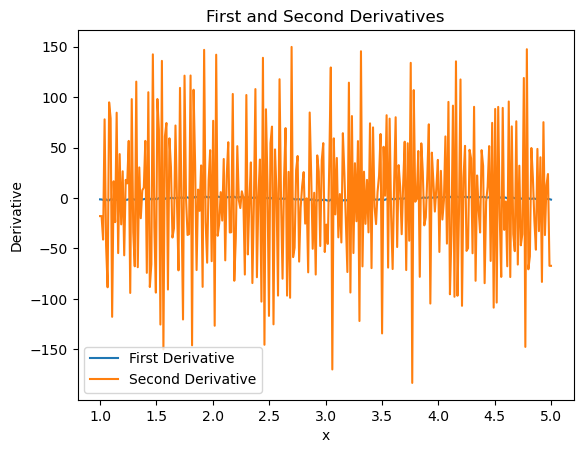

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Заданные данные
x = np.array([1.        , 1.01337793, 1.02675585, 1.04013378, 1.05351171,
       1.06688963, 1.08026756, 1.09364548, 1.10702341, 1.12040134,
       1.13377926, 1.14715719, 1.16053512, 1.17391304, 1.18729097,
       1.2006689 , 1.21404682, 1.22742475, 1.24080268, 1.2541806 ,
       1.26755853, 1.28093645, 1.29431438, 1.30769231, 1.32107023,
       1.33444816, 1.34782609, 1.36120401, 1.37458194, 1.38795987,
       1.40133779, 1.41471572, 1.42809365, 1.44147157, 1.4548495 ,
       1.46822742, 1.48160535, 1.49498328, 1.5083612 , 1.52173913,
       1.53511706, 1.54849498, 1.56187291, 1.57525084, 1.58862876,
       1.60200669, 1.61538462, 1.62876254, 1.64214047, 1.65551839,
       1.66889632, 1.68227425, 1.69565217, 1.7090301 , 1.72240803,
       1.73578595, 1.74916388, 1.76254181, 1.77591973, 1.78929766,
       1.80267559, 1.81605351, 1.82943144, 1.84280936, 1.85618729,
       1.86956522, 1.88294314, 1.89632107, 1.909699  , 1.92307692,
       1.93645485, 1.94983278, 1.9632107 , 1.97658863, 1.98996656,
       2.00334448, 2.01672241, 2.03010033, 2.04347826, 2.05685619,
       2.07023411, 2.08361204, 2.09698997, 2.11036789, 2.12374582,
       2.13712375, 2.15050167, 2.1638796 , 2.17725753, 2.19063545,
       2.20401338, 2.2173913 , 2.23076923, 2.24414716, 2.25752508,
       2.27090301, 2.28428094, 2.29765886, 2.31103679, 2.32441472,
       2.33779264, 2.35117057, 2.36454849, 2.37792642, 2.39130435,
       2.40468227, 2.4180602 , 2.43143813, 2.44481605, 2.45819398,
       2.47157191, 2.48494983, 2.49832776, 2.51170569, 2.52508361,
       2.53846154, 2.55183946, 2.56521739, 2.57859532, 2.59197324,
       2.60535117, 2.6187291 , 2.63210702, 2.64548495, 2.65886288,
       2.6722408 , 2.68561873, 2.69899666, 2.71237458, 2.72575251,
       2.73913043, 2.75250836, 2.76588629, 2.77926421, 2.79264214,
       2.80602007, 2.81939799, 2.83277592, 2.84615385, 2.85953177,
       2.8729097 , 2.88628763, 2.89966555, 2.91304348, 2.9264214 ,
       2.93979933, 2.95317726, 2.96655518, 2.97993311, 2.99331104,
       3.00668896, 3.02006689, 3.03344482, 3.04682274, 3.06020067,
       3.0735786 , 3.08695652, 3.10033445, 3.11371237, 3.1270903 ,
       3.14046823, 3.15384615, 3.16722408, 3.18060201, 3.19397993,
       3.20735786, 3.22073579, 3.23411371, 3.24749164, 3.26086957,
       3.27424749, 3.28762542, 3.30100334, 3.31438127, 3.3277592 ,
       3.34113712, 3.35451505, 3.36789298, 3.3812709 , 3.39464883,
       3.40802676, 3.42140468, 3.43478261, 3.44816054, 3.46153846,
       3.47491639, 3.48829431, 3.50167224, 3.51505017, 3.52842809,
       3.54180602, 3.55518395, 3.56856187, 3.5819398 , 3.59531773,
       3.60869565, 3.62207358, 3.63545151, 3.64882943, 3.66220736,
       3.67558528, 3.68896321, 3.70234114, 3.71571906, 3.72909699,
       3.74247492, 3.75585284, 3.76923077, 3.7826087 , 3.79598662,
       3.80936455, 3.82274247, 3.8361204 , 3.84949833, 3.86287625,
       3.87625418, 3.88963211, 3.90301003, 3.91638796, 3.92976589,
       3.94314381, 3.95652174, 3.96989967, 3.98327759, 3.99665552,
       4.01003344, 4.02341137, 4.0367893 , 4.05016722, 4.06354515,
       4.07692308, 4.090301  , 4.10367893, 4.11705686, 4.13043478,
       4.14381271, 4.15719064, 4.17056856, 4.18394649, 4.19732441,
       4.21070234, 4.22408027, 4.23745819, 4.25083612, 4.26421405,
       4.27759197, 4.2909699 , 4.30434783, 4.31772575, 4.33110368,
       4.34448161, 4.35785953, 4.37123746, 4.38461538, 4.39799331,
       4.41137124, 4.42474916, 4.43812709, 4.45150502, 4.46488294,
       4.47826087, 4.4916388 , 4.50501672, 4.51839465, 4.53177258,
       4.5451505 , 4.55852843, 4.57190635, 4.58528428, 4.59866221,
       4.61204013, 4.62541806, 4.63879599, 4.65217391, 4.66555184,
       4.67892977, 4.69230769, 4.70568562, 4.71906355, 4.73244147,
       4.7458194 , 4.75919732, 4.77257525, 4.78595318, 4.7993311 ,
       4.81270903, 4.82608696, 4.83946488, 4.85284281, 4.86622074,
       4.87959866, 4.89297659, 4.90635452, 4.91973244, 4.93311037,
       4.94648829, 4.95986622, 4.97324415, 4.98662207, 5.        ])

y = np.array([ 0.48863805,  0.4706063 ,  0.4493648 ,  0.42075058,  0.40608114,
        0.38294133,  0.34397085,  0.32196163,  0.3140574 ,  0.28508636,
        0.2590824 ,  0.22879908,  0.21364165,  0.18871463,  0.17157309,
        0.14975436,  0.13267386,  0.1054287 ,  0.08140074,  0.05995963,
        0.04864072,  0.02048689,  0.00986834, -0.00683534, -0.03565149,
       -0.04383209, -0.06428567, -0.07931248, -0.09793194, -0.11519411,
       -0.13062949, -0.1359394 , -0.15451834, -0.15434391, -0.16995244,
       -0.19729437, -0.19916606, -0.20620754, -0.23002474, -0.23628555,
       -0.23047724, -0.24710707, -0.23942271, -0.25857637, -0.26678739,
       -0.26170215, -0.27284519, -0.27340328, -0.26849006, -0.27058684,
       -0.27805442, -0.27266571, -0.26813815, -0.27644061, -0.26521816,
       -0.25489861, -0.26611842, -0.25564442, -0.2452349 , -0.24137907,
       -0.24394094, -0.22478145, -0.23174912, -0.21952174, -0.20088855,
       -0.19503158, -0.18768235, -0.18261683, -0.17177333, -0.17668631,
       -0.15533076, -0.13822566, -0.13259038, -0.12373451, -0.10640144,
       -0.10027304, -0.0804523 , -0.08328208, -0.06070371, -0.04482286,
       -0.03343396, -0.02100707, -0.01258064,  0.00276372,  0.00705245,
        0.01533925,  0.03351731,  0.04558241,  0.05157895,  0.07602384,
        0.0857951 ,  0.08844834,  0.10029526,  0.11172865,  0.12137859,
        0.1322108 ,  0.14310398,  0.14042411,  0.15600623,  0.16158499,
        0.16661173,  0.17795138,  0.17420817,  0.16943876,  0.18398173,
        0.18447575,  0.18538053,  0.19310823,  0.18246343,  0.19667835,
        0.18487044,  0.18879618,  0.19523542,  0.18077048,  0.17602092,
        0.18393253,  0.16944479,  0.16357239,  0.15855583,  0.13623582,
        0.13497459,  0.13340937,  0.11753257,  0.10511337,  0.10509054,
        0.0877562 ,  0.07505764,  0.04466765,  0.04106671,  0.02698227,
        0.00408617, -0.01386932, -0.02437554, -0.04616   , -0.06965996,
       -0.09103768, -0.10782492, -0.12915359, -0.15054097, -0.18511282,
       -0.2045241 , -0.2199459 , -0.24437012, -0.26786494, -0.30492996,
       -0.33444034, -0.35923335, -0.39254697, -0.41916829, -0.43605909,
       -0.46252906, -0.49371472, -0.53304183, -0.56596648, -0.57574361,
       -0.61592146, -0.64552114, -0.67802708, -0.70343358, -0.73581649,
       -0.76749808, -0.80706539, -0.83514307, -0.85887137, -0.88694473,
       -0.92814296, -0.94889084, -0.98639813, -1.00937506, -1.04211274,
       -1.06868071, -1.09937414, -1.11997578, -1.16238816, -1.17877914,
       -1.20729979, -1.23115284, -1.25959016, -1.28481186, -1.3161271 ,
       -1.33420269, -1.36471453, -1.38270606, -1.40226966, -1.42646112,
       -1.44956427, -1.46870423, -1.47649288, -1.50829415, -1.53101375,
       -1.55332363, -1.56095535, -1.58092825, -1.58682895, -1.59585189,
       -1.6174715 , -1.63632323, -1.64085533, -1.65408224, -1.66148126,
       -1.66693371, -1.67880729, -1.68812533, -1.68746128, -1.69957483,
       -1.70198022, -1.71196058, -1.69797514, -1.71677912, -1.71644881,
       -1.71677748, -1.71727519, -1.70944014, -1.71558185, -1.71203251,
       -1.70384492, -1.70050829, -1.70057077, -1.69670383, -1.67977146,
       -1.68155394, -1.67529224, -1.66600175, -1.65911615, -1.65036756,
       -1.63486243, -1.62892397, -1.61816981, -1.61123198, -1.60474294,
       -1.58733502, -1.57801458, -1.5516538 , -1.54236321, -1.53941575,
       -1.52009207, -1.51827931, -1.49223717, -1.48353035, -1.47737445,
       -1.45020072, -1.44214587, -1.43053664, -1.40968572, -1.39821305,
       -1.39563639, -1.38451407, -1.36636951, -1.35802387, -1.33351002,
       -1.32367539, -1.30984424, -1.29798304, -1.29223666, -1.2780077 ,
       -1.25809695, -1.25328938, -1.24915647, -1.243037  , -1.22771404,
       -1.22354855, -1.20605964, -1.20801043, -1.19416947, -1.19887309,
       -1.18742172, -1.17901188, -1.18459576, -1.17420289, -1.16945966,
       -1.16534322, -1.17333321, -1.16421488, -1.16911536, -1.16131656,
       -1.15992369, -1.16795747, -1.16239026, -1.16862322, -1.16913217,
       -1.17802895, -1.19333929, -1.18737164, -1.20780522, -1.20185831,
       -1.20855227, -1.22559971, -1.23378326, -1.23833275, -1.24691611,
       -1.26466511, -1.27370955, -1.28863025, -1.29633105, -1.31891104,
       -1.32804598, -1.34375795, -1.35719863, -1.3663852 , -1.38759841])

# Визуализация данных
plt.scatter(x, y, label='Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy Data')
plt.legend()
plt.show()

# Вычисление первой производной
def first_derivative(x, y):
    h = x[1] - x[0]  # шаг
    dydx = np.zeros_like(y)
    dydx[0] = (y[1] - y[0]) / h  # forward difference на первой точке
    dydx[-1] = (y[-1] - y[-2]) / h  # backward difference на последней точке
    dydx[1:-1] = (y[2:] - y[:-2]) / (2 * h)  # центральная разность на внутренних точках
    return dydx

# Вычисление второй производной
def second_derivative(x, y):
    h = x[1] - x[0]  # шаг
    d2ydx2 = np.zeros_like(y)
    d2ydx2[0] = (y[2] - 2 * y[1] + y[0]) / (h ** 2)  # forward difference на первой точке
    d2ydx2[-1] = (y[-1] - 2 * y[-2] + y[-3]) / (h ** 2)  # backward difference на последней точке
    d2ydx2[1:-1] = (y[2:] - 2 * y[1:-1] + y[:-2]) / (h ** 2)  # центральная разность на внутренних точках
    return d2ydx2

# Вычисление производных
dydx = first_derivative(x, y)
d2ydx2 = second_derivative(x, y)

# Визуализация результатов
plt.plot(x, dydx, label='First Derivative')
plt.plot(x, d2ydx2, label='Second Derivative')
plt.xlabel('x')
plt.ylabel('Derivative')
plt.title('First and Second Derivatives')
plt.legend()
plt.show()
